# Matroids and Greedy algorithms

First we will start with a definition of a new discrete math entity, called a [matroid](https://en.wikipedia.org/wiki/Matroid).

Matroids are used in a subset of discrete optimization problems to find optimal subsets in **linear or polynomial time** (compare to travelling salesman, where time is exponential).

Matroid is defined like this:

$\large M = (E, I)$.
- $E$ is called a groud set. In this set we will be looking for an optimal subset.

![](img/matroid-e.png)

- $I$ - is a set of subsets of E with some magic property. Formally, $I \subset 2^E$. The property which we will describe later is called independece and $I$ itself is called a set of **independent sets**.

![](img/matroid-i.png)

## Independence property

Originally name of the property came from linear algebra, where it was reflecting linear independence of matrix rows ($\det A \neq 0$). Later it was generalized for other mathematical objects. And it was defined through the properties of the property :)

- $\emptyset$ is independent
- if $S$ is indepentent ($S\in I$), $\forall X \subset S$, $X$ is also independent ($X\in I$). Thus, independent sets are nested.
- Biggest independent sets are of the same size (and it is called a *rank*). This is expressed with the formula: $A, B\in I; |A|<|B|\implies \exists x\in B-A, A\cup{\{x\}}\in I$.

Thus, any property which we satisfies these conditions can be called "independence", and the problem, which involves this property will be automatically *defined on a matroid*. This is very important, as matroids are cool.

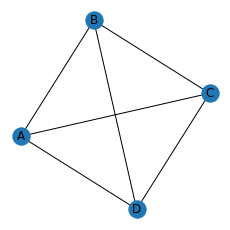

In [12]:
#  A set of edges is independent if and only if, 
# for every edge in the set, removing the edge would increase 
# the number of degrees of freedom of the remaining subgraph

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    "AB", "BC", "CD", "AD", "BD", "AC"
])
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True)
plt.show()

Removing any egde here will not result in increasing DOF. But any 2 will do. Thus, biggest indepent sets are:
-  "BC", "CD", "AD", "BD", "AC"
-  "AB", "CD", "AD", "BD", "AC"
-  "AB", "BC", "AD", "BD", "AC"
-  "AB", "BC", "CD", "BD", "AC"
-  "AB", "BC", "CD", "AD", "AC"
-  "AB", "BC", "CD", "AD", "BD"

E.g.

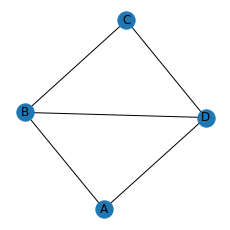

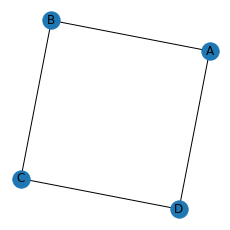

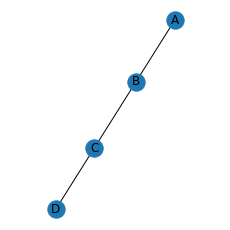

In [14]:
G1 = nx.Graph()
G1.add_edges_from([
    "AB", "BC", "CD", "AD", "BD"
])
plt.figure(figsize=(3,3))
nx.draw(G1, with_labels=True)
plt.show()

G2 = nx.Graph()
G2.add_edges_from([
    "AB", "BC", "CD", "AD"
])
plt.figure(figsize=(3,3))
nx.draw(G2, with_labels=True)
plt.show()


G3 = nx.Graph()
G3.add_edges_from([
    "AB", "BC", "CD"
])
plt.figure(figsize=(3,3))
nx.draw(G3, with_labels=True)
plt.show()